<a href="https://colab.research.google.com/github/AnnaNik334743/PDA23-24/blob/master/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

На первой практике вам предстоит поработать с реальными данными об истории экспертиз рабочих программ дисциплин в ИТМО.

**Задача:** сделать краткое исследование данных и построить 3 графика двумя способами. Первый способ - самостоятельно. Второй - с активной помощью ChatGPT. Порядок реализации способов значения не имеет. Библиотеки можно использовать любые.

**Цель:** оценить качество помощи ChatGPT для аналитики.

## Загрузка данных

Загрузим датасет в колаб, найти его также можно в папке [Data](https://drive.google.com/drive/folders/1NklhwWT6KVrtRF9GxnI-Z30QKNtNYae1?usp=share_link).

In [ ]:
import pandas as pd

!gdown 1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8

Downloading...
From: https://drive.google.com/uc?id=1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8
To: /content/exp_stats.csv
100% 925k/925k [00:00<00:00, 29.0MB/s]


Посмотрим на данные.

In [ ]:
data = pd.read_csv("/content/exp_stats.csv", parse_dates=['approval_date_y'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   workprogram_id     7657 non-null   int64 
 1   user_count         7657 non-null   int64 
 2   expertise_status   7657 non-null   object
 3   expertise_counter  7657 non-null   int64 
 4   approval_date_y    7657 non-null   object
 5   title              7657 non-null   object
dtypes: int64(3), object(3)
memory usage: 359.0+ KB


In [ ]:
len(data) - len(data.drop_duplicates())

0

Всего шесть столбцов, все без пропусков:
- `workprogram_id` - айди рабочей программы (РПД)
- `user_count` - сколько человек принимали участие в создании РПД
- `expertise_status` - на каком этапе экспертизы находится РПД (статус экспертизы: AC - одобрена, RE - на доработке, AR - в архиве, EX - на экспертизе, WK - в работе)
- `expertise_counter` - сколько раз РПД проходила экспертизу
- `approval_date` - день, когда РПД признали удовлетворяющей всем требованиям и разрешили ее реализовывать
- `title` - название дисциплины


In [ ]:
data.head()

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
0,2626,4,AC,1,2022-05-06 14:23:17.924000+02:00,Философия
1,8461,4,AC,1,2022-04-28 09:01:59.171000+02:00,Философия
2,2627,3,AC,5,2021-08-31 20:51:19.142000+02:00,Введение в цифровую культуру и программирование
3,2628,4,AC,0,2022-04-28 11:36:30.474000+02:00,Проектирование баз данных
4,2631,4,AC,0,2022-04-28 12:06:31.165000+02:00,Современные вопросы информатики


## Краткое исследование данных

В данных не слишком много столбцов и уже известно, что нет пустых ячеек. Теперь неплохо было бы погрузиться в них и ответить на 3 небольших вопроса:
1. Какой период охватывают данные в датасете?
2. Есть ли в данных нетипичные значения? Например, неположительные числа в столбце `user_count`. Или даты, которые сильно выбиваются из общего диапазона значений.
3. Есть ли нелогичные значения в данных? Например, статус РПД "в работе", но есть `approval_date`. Или статус "одоберно", но РПД 0 раз проходила экспертизу.



Период. Дата указана вообще везде вне зависимости от статуса РПД.

In [ ]:
data.approval_date_y.isna().sum()

0

In [ ]:
data.approval_date_y.agg(['min', 'max'])

min   2021-04-21 11:32:30.614000+02:00
max   2023-04-17 11:35:20.872000+02:00
Name: approval_date_y, dtype: datetime64[ns, tzoffset(None, 7200)]

Люди. С ними всё ок.

In [ ]:
data.user_count.describe()  # всё ок

count    7657.000000
mean        3.386052
std         2.066325
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: user_count, dtype: float64

<Axes: >

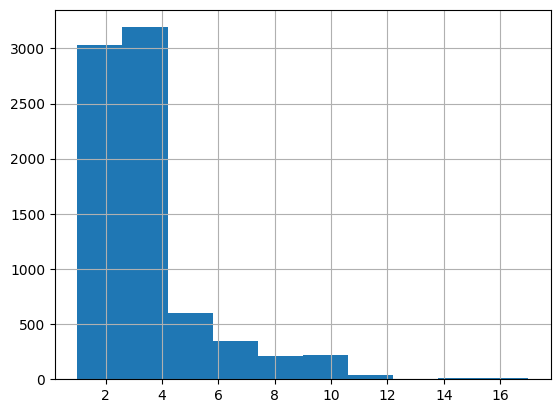

In [ ]:
data.user_count.hist()

С экспертизой тоже вроде нет проблем.

In [ ]:
data.expertise_status.value_counts()

AC    7001
RE     416
AR     218
EX      18
WK       4
Name: expertise_status, dtype: int64

In [ ]:
data.expertise_counter.describe()

count    7657.000000
mean        0.948936
std         1.149317
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: expertise_counter, dtype: float64

<Axes: >

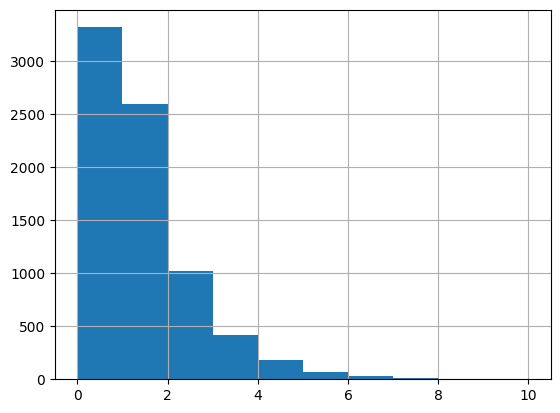

In [ ]:
data.expertise_counter.hist()

In [ ]:
len(data[data.expertise_counter > 2])  # помянем...

715

Мне искренне интересно, откуда принятые РПД, не проходившие проверку ни разу.

In [ ]:
data[data.expertise_counter == 0].expertise_status.value_counts()

AC    2919
RE     267
AR     124
EX       7
WK       3
Name: expertise_status, dtype: int64

Теперь ответьте на более интересные вопросы с использованием визуализаций.

### 1. Как распределяется количество редакторов рабочих программ на всем периоде наблюдений?

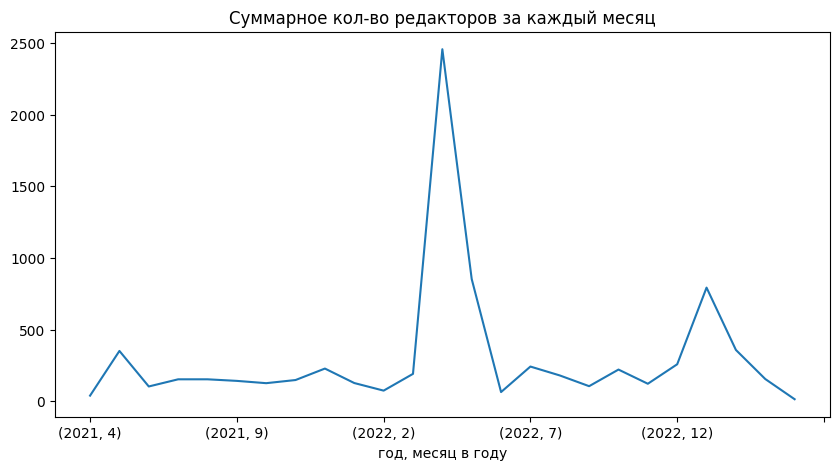

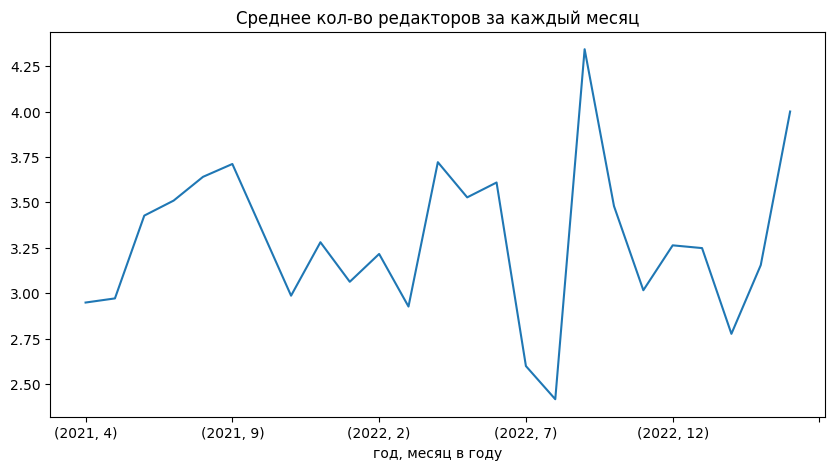

In [ ]:
import matplotlib.pyplot as plt

week_groups = data.groupby([pd.to_datetime(data['approval_date_y'], utc=True).dt.year, pd.to_datetime(data['approval_date_y'], utc=True).dt.month])['user_count'].count()
week_groups.plot(kind='line', figsize=(10, 5), xlabel='год, месяц в году', title='Суммарное кол-во редакторов за каждый месяц', legend=None)
plt.show()

week_groups = data.groupby([pd.to_datetime(data['approval_date_y'], utc=True).dt.year, pd.to_datetime(data['approval_date_y'], utc=True).dt.month])['user_count'].mean()
week_groups.plot(kind='line', figsize=(10, 5), xlabel='год, месяц в году', title='Среднее кол-во редакторов за каждый месяц', legend=None)
plt.show()

А вот, что выдал ChatGPT с первого раза:

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(data)

# Преобразование столбца approval_date в тип datetime
df['approval_date'] = pd.to_datetime(df['approval_date_y'], utc=True)

# Создание графика
fig = px.scatter(df, x='approval_date_y', y='user_count', color='expertise_status',
                 color_discrete_map={'AC': 'blue', 'RE': 'red', 'EX': 'green', 'WK': 'orange', 'AR': 'purple'},
                 title='Распределение количества редакторов рабочих программ по времени',
                 labels={'approval_date_y': 'Дата одобрения', 'user_count': 'Количество редакторов'},
                 hover_data=['workprogram_id', 'title'])

# Настройка палитры цветов
fig.update_traces(marker=dict(size=12, opacity=0.7))

# Отображение графика
fig.show()

И со следующего, где я попросила сгруппировать данные по месяцам.

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date_y'], utc=True)

# Group the data by months
df['month'] = df['approval_date'].dt.strftime('%Y-%m')

# Aggregate user_count by month
monthly_data = df.groupby('month')['user_count'].sum().reset_index()

# Create the graph
fig = px.line(monthly_data, x='month', y='user_count',
             title='Distribution of Editors per Month',
             labels={'month': 'Month', 'user_count': 'Editor Count'},
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize x-axis tick labels
fig.update_xaxes(
    tickangle=45,  # Rotate the tick labels by 45 degrees
    tickvals=monthly_data['month'],  # Specify tick values
    ticktext=monthly_data['month']  # Specify tick text
)

# Show the graph
fig.show()

### 2. Как со временем менялось среднее количество экспертиз РПД?

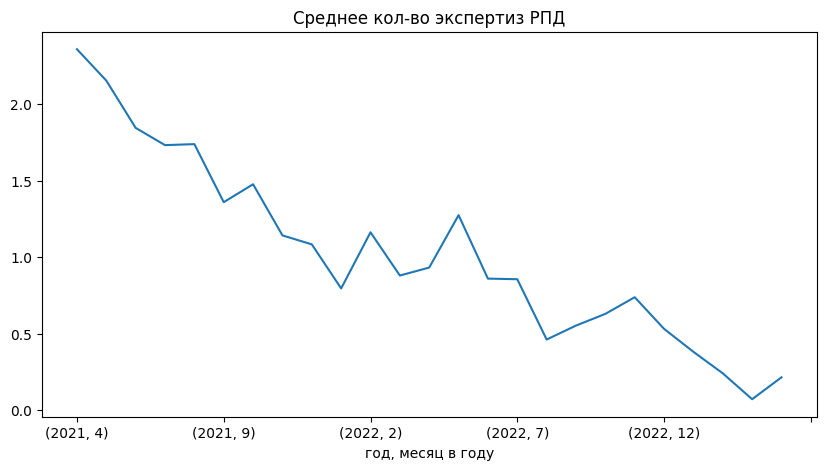

In [ ]:
week_groups = data.groupby([pd.to_datetime(data['approval_date_y'], utc=True).dt.year, pd.to_datetime(data['approval_date_y'], utc=True).dt.month])['expertise_counter'].mean()
week_groups.plot(kind='line', figsize=(10, 5), xlabel='год, месяц в году', title='Среднее кол-во экспертиз РПД', legend=None)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date'], utc=True)

# Group the data by month and calculate the average expertise_counter
df['month'] = df['approval_date'].dt.strftime('%Y-%m')
monthly_avg_expertise = df.groupby('month')['expertise_counter'].mean().reset_index()


# Create the graph (with grouping by month)
fig = px.line(monthly_avg_expertise, x='month', y='expertise_counter',
              title='Average Expertise Counter (Grouped by Month)',
              labels={'month': 'Month', 'expertise_counter': 'Average Expertise Counter'})

# Customize x-axis tick labels
fig.update_xaxes(
    tickangle=45,  # Rotate the tick labels by 45 degrees
    tickvals=monthly_data['month'],  # Specify tick values
    ticktext=monthly_data['month']  # Specify tick text
)

# Show graph
fig.show()

### 3. Есть ли зависимость между датой и присвоением статуса "одобрено" (AC)?

In [ ]:
def change(group):
  return group['expertise_status'].value_counts(normalize=True)['AC']

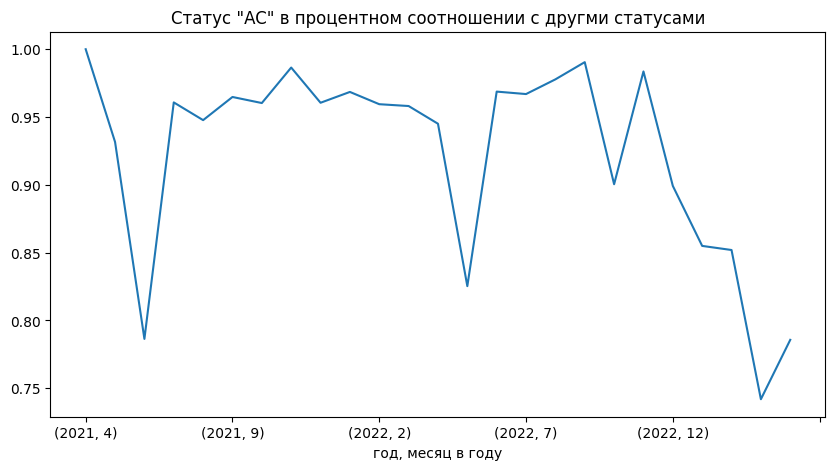

In [ ]:
week_groups = data.groupby([pd.to_datetime(data['approval_date_y'], utc=True).dt.year, pd.to_datetime(data['approval_date_y'], utc=True).dt.month]).apply(change)
week_groups.plot(kind='line', figsize=(10, 5), xlabel='год, месяц в году', title='Статус "AC" в процентном соотношении с другми статусами', legend=None)
plt.show()

ChatGPT прекрасен.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date'], utc=True)

# Create a new column 'is_approved' based on 'expertise_status'
df['is_approved'] = df['expertise_status'] == 'AC'

# Create the graph
fig = px.scatter(df, x='approval_date', y='is_approved',
                 title='Dependency between Approval Date and "AC" Status',
                 labels={'approval_date': 'Approval Date', 'is_approved': 'Is Approved'},
                 color='is_approved',
                 color_discrete_sequence=['red', 'green'])

# Show the graph
fig.show()

Попросила сделать график более репрезентативным.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date'], utc=True)

# Group by date and count the number of "AC" statuses
daily_ac_counts = df[df['expertise_status'] == 'AC'].groupby(df['approval_date'].dt.date)['expertise_status'].count()

# Create the graph
fig = px.line(daily_ac_counts, x=daily_ac_counts.index, y=daily_ac_counts.values,
              title='Number of "AC" Statuses Over Time',
              labels={'x': 'Date', 'y': 'Count of "AC" Status'},
              markers=True)

# Customize x-axis tick labels
fig.update_xaxes(
    tickangle=45,  # Rotate the tick labels by 45 degrees
    tickvals=monthly_data['month'],  # Specify tick values
    ticktext=monthly_data['month']  # Specify tick text
)

# Show the graph
fig.show()


Предложила ChatGPT посчитать процентное соотношение AC и показать цветом точек процент, а размером общее количестве РПД за период, где период равен месяцу.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings('ignore')

df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date_y'], utc=True)

# Group by month and calculate the percentage of "AC" statuses and total count per month
monthly_data = df.groupby(df['approval_date'].dt.to_period('M'))['expertise_status'].agg(
    ac_percentage=lambda x: (x == 'AC').sum() / len(x),
    total_count='count'
).reset_index()

# Convert Period to string for JSON serialization
monthly_data['approval_date'] = monthly_data['approval_date'].astype(str)

# Create the graph
fig = px.scatter(monthly_data, x='approval_date', y='ac_percentage',
                 size='total_count', color='ac_percentage',
                 title='AC Status Percentage vs. Total Count per Month',
                 labels={'approval_date': 'Month', 'ac_percentage': 'AC Status Percentage'},
                 color_continuous_scale='deep', opacity=0.9,
                 size_max=50)

# Add a line connecting the scatters
fig.add_trace(go.Scatter(x=monthly_data['approval_date'], y=monthly_data['ac_percentage'],
                         mode='lines', line=dict(color='white', width=1), opacity=0.9, showlegend=False))

# Show the graph
fig.show()

Попросила поменять местами линию и точки. Получила современное искусство. Будем считать, что и прежде было ок.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.DataFrame(data)

# Convert the 'approval_date' column to datetime
df['approval_date'] = pd.to_datetime(df['approval_date'], utc=True)

# Group by month and calculate the percentage of "AC" statuses and total count per month
monthly_data = df.groupby(df['approval_date'].dt.to_period('M'))['expertise_status'].agg(
    ac_percentage=lambda x: (x == 'AC').sum() / len(x),
    total_count='count'
).reset_index()

# Convert Period to string for JSON serialization
monthly_data['approval_date'] = monthly_data['approval_date'].astype(str)

# Create the graph
fig = go.Figure()

# Add a line connecting the scatters
fig.add_trace(go.Scatter(x=monthly_data['approval_date'], y=monthly_data['ac_percentage'],
                         mode='lines', line=dict(color='white', width=1), opacity=0.9,
                         showlegend=False))  # Remove legend for the line

# Add scatter plots
fig.add_trace(go.Scatter(x=monthly_data['approval_date'], y=monthly_data['ac_percentage'],
                         mode='markers', marker=dict(size=monthly_data['total_count'],
                                                    color=monthly_data['ac_percentage'],
                                                    colorbar=dict(title='AC Status Percentage')),
                         text=monthly_data['total_count'],
                         name='AC Status Percentage vs. Total Count per Month'))

# Update the layout
fig.update_layout(title='AC Status Percentage vs. Total Count per Month',
                  xaxis_title='Month', yaxis_title='AC Status Percentage',
                  coloraxis_colorbar=dict(title='AC Status Percentage'))

# Show the graph
fig.show()

<ipython-input-132-cd4e11d190c9>:11: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Вывод: ChatGPT лучше пишет код. Намного лучше. И быстрее. Но нужно понимать, что ты от него хочешь и хорошо представлять себе конечный результат. Работа с генеративной моделью - это итеративный процесс, который позволяет добиться положительных результатов. Бездумно использовать написанный моделью код не стоит.